# Multiple Linear Regression

In [61]:
import pandas as pd
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [62]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [66]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']      ## Target is numeric so its regerssion

In [67]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [68]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [69]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=1/3,random_state=0)

In [70]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

regressor.fit(x_train,y_train)      ## fit

LinearRegression()

In [71]:
print(regressor.intercept_)
print(list(zip(regressor.coef_)))

2.9037645043192004
[(0.044345897197471604,), (0.1966059115260811,), (0.002625617486140236,)]


In [72]:
x_pred=regressor.predict(x_train)
y_pred=regressor.predict(x_test)

In [73]:
import numpy as np
import pandas as pd

y_test = pd.Series(y_test).reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)


# matrics

In [74]:
import numpy as np
from sklearn import metrics

In [75]:
MeanAbErr=metrics.mean_absolute_error(y_test,y_pred)
print(MeanAbErr)

1.1855503777750762


In [76]:
MeanSqErr=metrics.mean_squared_error(y_test,y_pred)
print(MeanSqErr)

3.38647860549598


In [87]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

RMSE: 1.8402387360057335


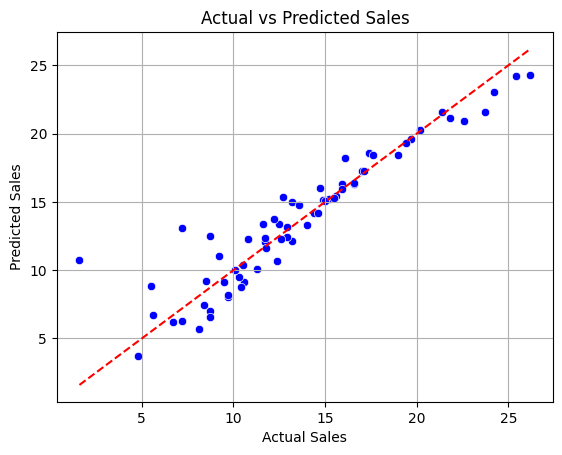

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure()
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45-degree line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


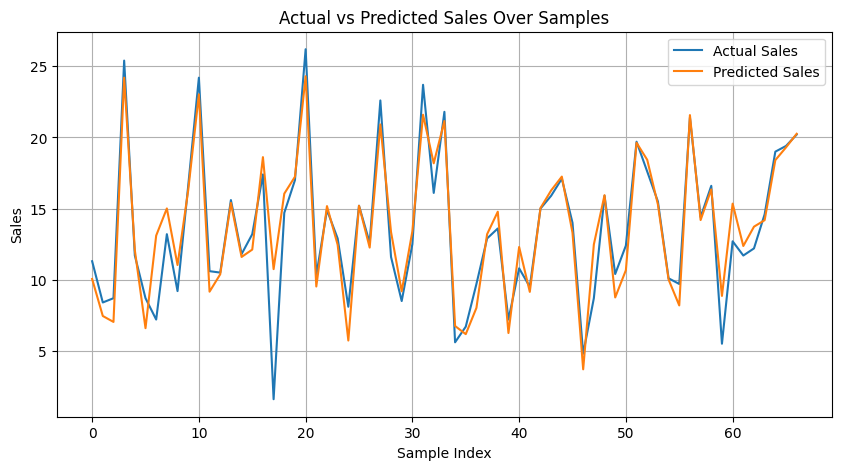

In [86]:
# 

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales Over Samples")
plt.legend()
plt.grid(True)
plt.show()


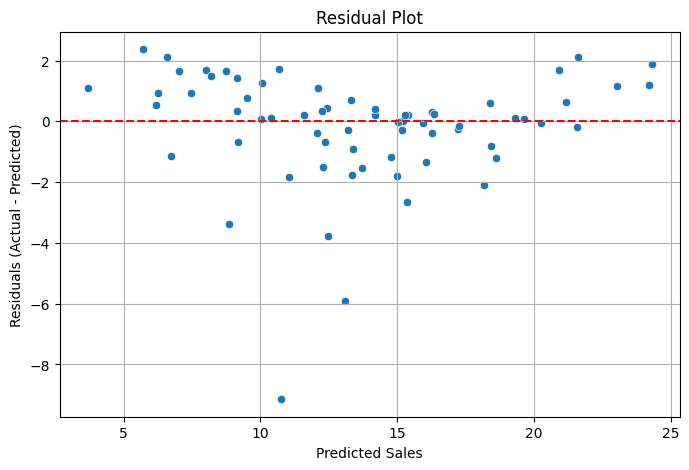

In [80]:
# Purpose: Visualizes model errors.
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


# EDA

<AxesSubplot:>

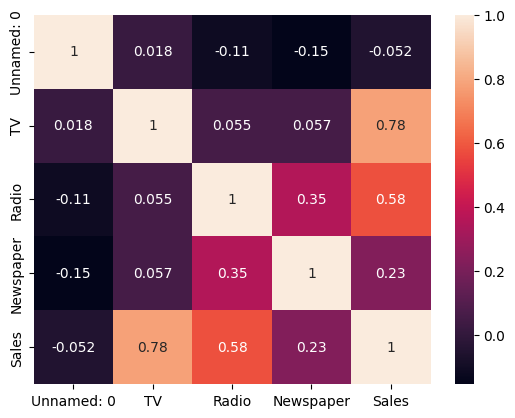

In [18]:
sns.heatmap(df.corr(),annot=True)

### Insight:
Which type of advertising affects sales most?

-in descending order

1-TV

2-RADIO

3-NEWSPAPER

### Total spend on in each type of advertising

In [26]:
df['TV'].sum()

29408.5

In [27]:
df['Radio'].sum()

4652.800000000001

In [28]:
df['Newspaper'].sum()

6110.799999999999

In [29]:
# total advertisement spending

In [34]:
tot_adv=df['TV'].sum()+df['Radio'].sum()+df['Newspaper'].sum()
tot_sales=df['Sales'].sum()

In [35]:
tot_adv

40172.100000000006

In [36]:
tot_sales

2804.5